In [1]:
import numpy as np
import pandas as pd
import math
from typing import Callable

# Funciones para las soluciones exactas
def solucion_exacta_a(t):
    return t / (1 + math.log(t))

def solucion_exacta_b(t):
    return t * math.tan(math.log(t))

def solucion_exacta_c(t):
    return -3 + 2 / (1 + math.exp(-2 * t))

def solucion_exacta_d(t):
    return t ** 2 + (1 / 3) * math.exp(-5 * t)

# Definimos las funciones derivadas
derivada_a = lambda t, y: y/t - (y/t)**2
derivada_b = lambda t, y: 1 + y/t + (y/t)**2
derivada_c = lambda t, y: -(y + 1)*(y + 3)
derivada_d = lambda t, y: -5*y +5*(t)**2 +2*t

# Método de Euler para aproximación numérica
def euler_ode_solver(inicio: float, fin: float, derivada: Callable[[float, float], float], y_inicial: float, paso: float) -> tuple[list[float], list[float]]:
    t_actual = inicio
    t_lista = [t_actual]
    y_lista = [y_inicial]

    while t_actual < fin:
        y_actual = y_lista[-1]
        y_nuevo = y_actual + paso * derivada(t_actual, y_actual)
        y_lista.append(y_nuevo)
        t_actual += paso
        t_lista.append(t_actual)

    return y_lista, t_lista

# Configuraciones del problema a resolver
configuraciones = [
    (derivada_a, 1, 2, 1, 0.1, solucion_exacta_a),
    (derivada_b, 1, 3, 0, 0.2, solucion_exacta_b),
    (derivada_c, 0, 2, -2, 0.2, solucion_exacta_c),
    (derivada_d, 0, 1, 1/3, 0.1, solucion_exacta_d)
]

# Solucionamos usando el método de Euler y guardamos en archivos CSV
for idx, (derivada, inicio, fin, y_inicial, paso, solucion_exacta) in enumerate(configuraciones, 1):
    y_aprox, tiempos = euler_ode_solver(inicio=inicio, fin=fin, derivada=derivada, y_inicial=y_inicial, paso=paso)
    y_exacta = [solucion_exacta(t) for t in tiempos]
    errores = [abs(y_aprox[i] - y_exacta[i]) for i in range(len(tiempos))]

    resultados = pd.DataFrame({"Tiempo": tiempos, "Y_aprox": y_aprox, "Y_exacta": y_exacta, "Error": errores})
    archivo = f"soluciones_4.{idx}.csv"
    resultados.to_csv(archivo, index=False)

print("Los resultados de las aproximaciones y errores se han guardado en los archivos CSV.")


Los resultados de las aproximaciones y errores se han guardado en los archivos CSV.



Aproximación de Euler para y' = t / (1 + log t)
    Tiempo   Y_aprox  Y_exacta     Error
0      1.0  1.000000  1.000000  0.000000
1      1.1  1.000000  1.004282  0.004282
2      1.2  1.008264  1.014952  0.006688
3      1.3  1.021689  1.029814  0.008124
4      1.4  1.038515  1.047534  0.009019
5      1.5  1.057668  1.067262  0.009594
6      1.6  1.078461  1.088433  0.009972
7      1.7  1.100432  1.110655  0.010223
8      1.8  1.123262  1.133654  0.010392
9      1.9  1.146724  1.157228  0.010505
10     2.0  1.170652  1.181232  0.010581


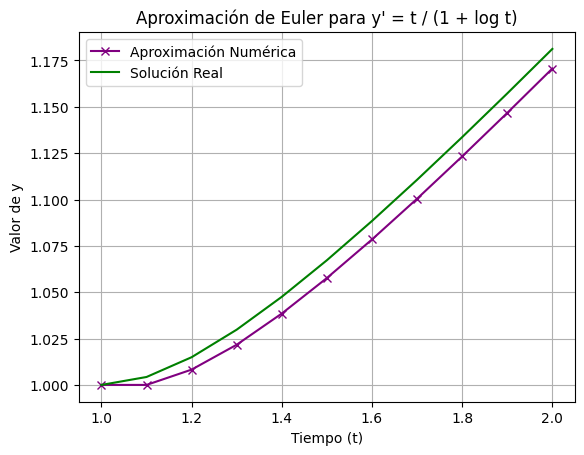


Aproximación de Euler para y' = t * tan(log t)
    Tiempo   Y_aprox  Y_exacta     Error
0      1.0  0.000000  0.000000  0.000000
1      1.2  0.200000  0.221243  0.021243
2      1.4  0.438889  0.489682  0.050793
3      1.6  0.721243  0.812753  0.091510
4      1.8  1.052038  1.199439  0.147401
5      2.0  1.437251  1.661282  0.224031
6      2.2  1.884261  2.213502  0.329241
7      2.4  2.402270  2.876551  0.474282
8      2.6  3.002837  3.678475  0.675638
9      2.8  3.700601  4.658665  0.958064
10     3.0  4.514277  5.874100  1.359823


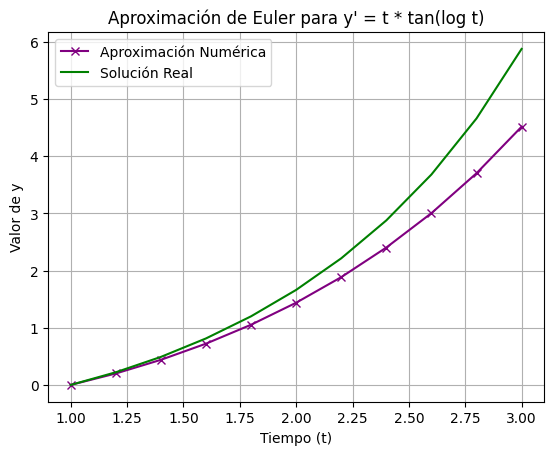


Aproximación de Euler para y' = -3 + 2 / (1 + e^(-2t))
    Tiempo   Y_aprox  Y_exacta     Error
0      0.0 -2.000000 -2.000000  0.000000
1      0.2 -1.800000 -1.802625  0.002625
2      0.4 -1.608000 -1.620051  0.012051
3      0.6 -1.438733 -1.462950  0.024218
4      0.8 -1.301737 -1.335963  0.034226
5      1.0 -1.199251 -1.238406  0.039155
6      1.2 -1.127491 -1.166345  0.038854
7      1.4 -1.079745 -1.114648  0.034903
8      1.6 -1.049119 -1.078331  0.029212
9      1.8 -1.029954 -1.053194  0.023240
10     2.0 -1.018152 -1.035972  0.017821
11     2.2 -1.010957 -1.024257  0.013300


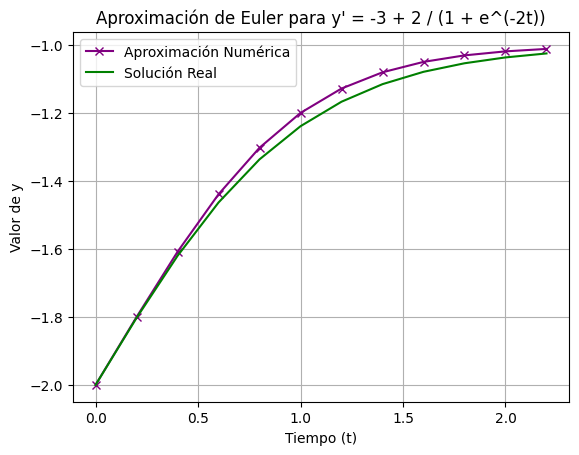


Aproximación de Euler para y' = t^2 + (1/3) * e^(-5t)
    Tiempo   Y_aprox  Y_exacta     Error
0      0.0  0.333333  0.333333  0.000000
1      0.1  0.166667  0.212177  0.045510
2      0.2  0.108333  0.162626  0.054293
3      0.3  0.114167  0.164377  0.050210
4      0.4  0.162083  0.205112  0.043028
5      0.5  0.241042  0.277362  0.036320
6      0.6  0.345521  0.376596  0.031075
7      0.7  0.472760  0.500066  0.027305
8      0.8  0.621380  0.646105  0.024725
9      0.9  0.790690  0.813703  0.023013
10     1.0  0.980345  1.002246  0.021901
11     1.1  1.190173  1.211362  0.021190


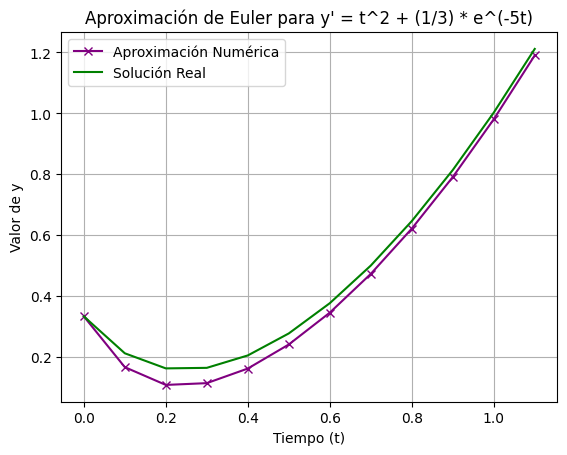

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de archivos CSV que contienen los resultados
archivos = ["soluciones_4.1.csv", "soluciones_4.2.csv", "soluciones_4.3.csv", "soluciones_4.4.csv"]
titulos = [
    "Aproximación de Euler para y' = t / (1 + log t)",
    "Aproximación de Euler para y' = t * tan(log t)",
    "Aproximación de Euler para y' = -3 + 2 / (1 + e^(-2t))",
    "Aproximación de Euler para y' = t^2 + (1/3) * e^(-5t)"
]

# Carga y visualización de los datos
for archivo, titulo in zip(archivos, titulos):
    df = pd.read_csv(archivo)
    print(f"\n{titulo}")
    print(df)

    # Creación de gráficos para la solución numérica y la exacta
    plt.figure()
    plt.plot(df["Tiempo"], df["Y_aprox"], marker='x', color='purple', label="Aproximación Numérica")
    plt.plot(df["Tiempo"], df["Y_exacta"], color='green', label="Solución Real")
    plt.xlabel('Tiempo (t)')
    plt.ylabel('Valor de y')
    plt.title(titulo)
    plt.legend()
    plt.grid(True)
    plt.show()
